In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

In [2]:
# Define the Oracle (marks the |11> state)
def grover_oracle():
    oracle = QuantumCircuit(2)
    oracle.cz(0,1) # Controlled-Z gate to mark |11>
    return oracle

In [3]:
# Define the Diffusion Operator (amplifies the correct stae)
def diffusion_operator():
    diffusion = QuantumCircuit(2)
    diffusion.h([0,1]) # Apply Hadamard gates
    diffusion.x([0,1]) # Apply X gates
    diffusion.cz(0,1) # Apply Controlled-Z gate
    diffusion.x([0,1]) # Apply X gate again
    diffusion.h([0,1]) # Apply Hadamard gates again
    return diffusion

In [4]:
# Create a 2-qubit quantum circuit
qc = QuantumCircuit(2,2)

{'11': 1000}


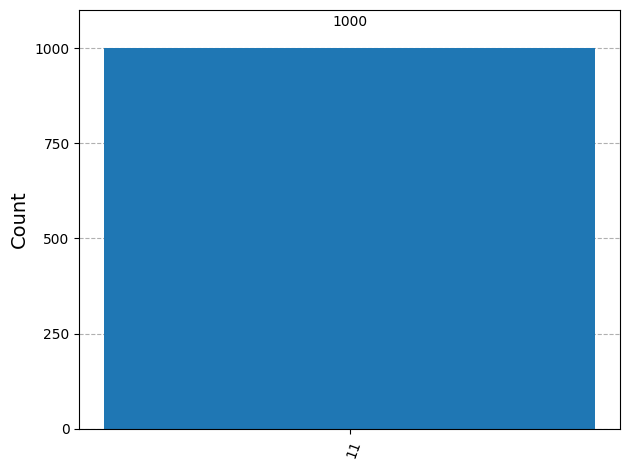

In [5]:
# Step 1: Initialize with Hadamard gates 
qc.h([0,1])

# Step 2: App.y Grover's Oracle using .comose()
qc = qc.compose(grover_oracle())

# Step 3: Apply the Diffsion Operator Using .compose()
qc = qc.compose(diffusion_operator())

# Step 4: Measure the qubits
qc.measure([0,1], [0,1])

# Draw the circuit
qc.draw('mpl')

# Use Aer simulator
simulator = Aer.get_backend('aer_simulator')

# Execute the circuit
job = simulator.run(qc, shots=1000)
result = job.result()

# Get the measurements results
counts = result.get_counts(qc)
print(counts)

# Plot the results
plot_histogram(counts)